Implementing a Given intensity transform on a image



51
101
106
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50 101 103 104
 106 107 109 110 112 113 115 117 118 120 121 123 124 126 127 129 131 132
 134 135 137 138 140 141 143 144 146 148 149 151 152 154 155 157 158 160
 162 163 165 166 168 169 171 172 174 175 177 179 180 182 183 185 186 188
 189 191 193 194 196 197 199 200 202 203 205 206 208 210 211 213 214 216
 217 219 220 222 224 225 227 228 230 231 233 234 236 237 239 241 242 244
 245 247 248 250 251 253 255 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243

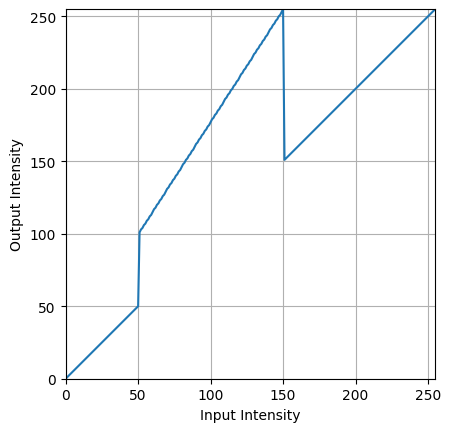

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# ----- Define each segment -----
# Segment 1: (0, 0) -> (50, 50)
t1 = np.linspace(0, 50, 51)  # 51 points
print(len(t1))  # Should be 51

# Segment 2: (50, 100) -> (150, 255)
# Jump at 50 means we start from 100
t2 = np.linspace(100, 255, 100)  # 100 points
print(len(t2))

# Segment 3: (150, 150) -> (255, 255)
# Drop at 150 means we start from 150
t3 = np.linspace(150, 255, 105)  # 105 points
print(len(t3))  # Should be 105

# ----- Build full LUT -----
# Remove duplicate points at 50 and 150 when concatenating
transform = np.concatenate((t1, t2[1:], t3[1:])).astype('uint8')
print(len(transform))  # Should be a 1D array with unique values)
# Check LUT length
print("LUT length:", len(transform))  # Should be 256

# ----- Plot transformation curve -----
fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel('Input Intensity')
ax.set_ylabel('Output Intensity')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.grid(True)
plt.show()

# ----- Read grayscale image -----
img_orig = cv.imread(r'a1images\a1images\emma.jpg', cv.IMREAD_GRAYSCALE)


# ----- Apply transformation -----
image_transformed = cv.LUT(img_orig, transform)

# ----- Display results -----
cv.imshow("Original", img_orig)
cv.imshow("Transformed", image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()


2. White matter Gray matter Question
 

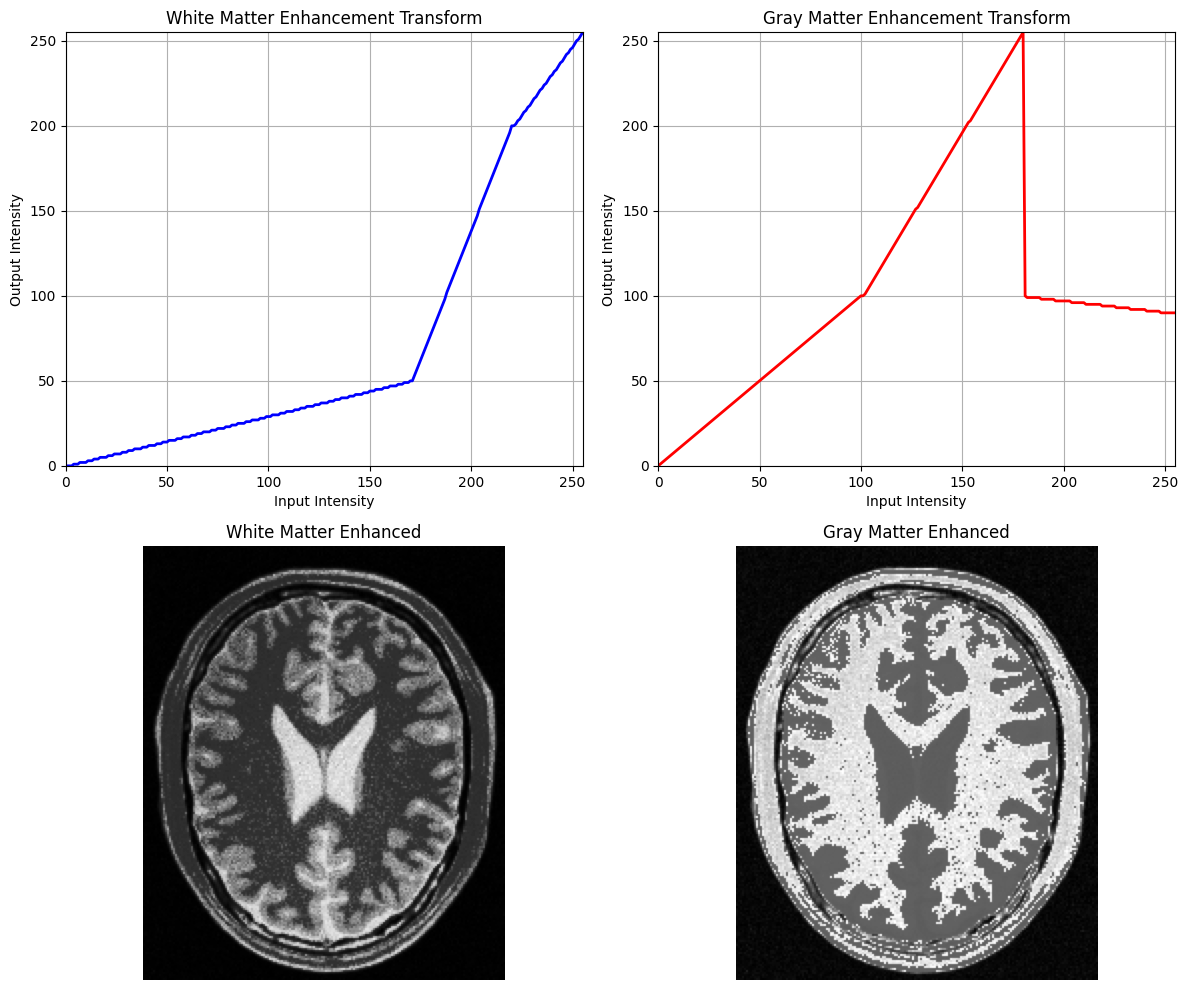

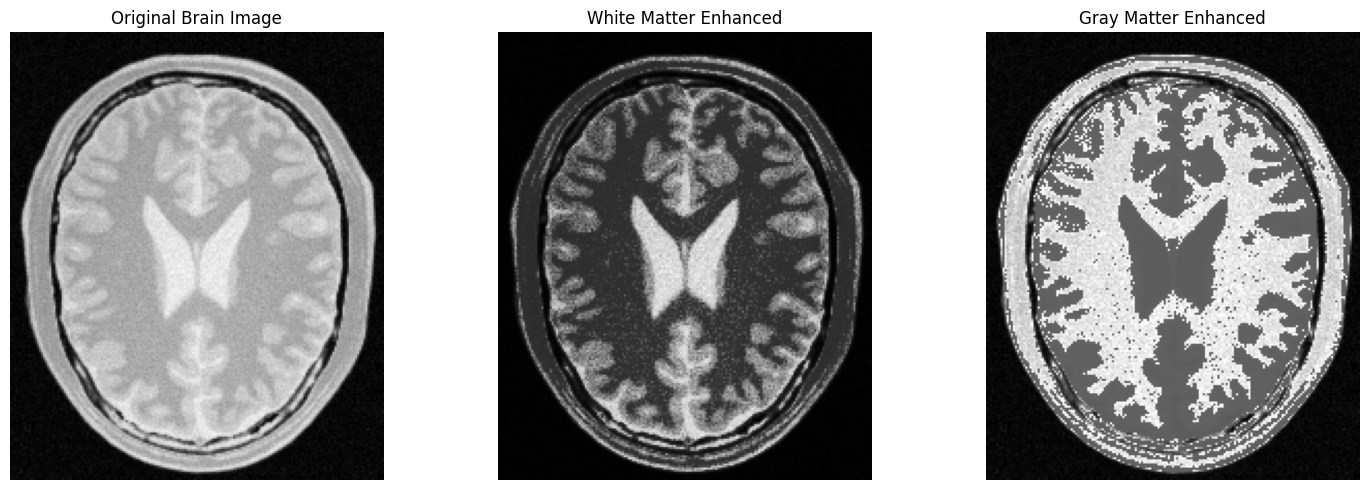

In [10]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read the brain image
brain_img = cv.imread(r'a1images\a1images\brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)  


# Create transformation to enhance white matter
def create_white_matter_transform():
    # Segment 1: (0, 0) -> (170, 50)
    t1 = np.linspace(0, 50, 171)  # 0-170 input, 0-50 output

    # Segment 2: (171, 50) -> (220, 200)
    t2 = np.linspace(50, 200, 50)  # 171-220 input, 50-200 output

    # Segment 3: (221, 200) -> (255, 255)
    t3 = np.linspace(200, 255, 35)  # 221-255 input, 200-255 output

    # Concatenate all segments to make 256 elements
    lut = np.concatenate([t1, t2, t3]).astype(np.uint8)
    lut = lut[:256]  # Ensure length is exactly 256
    return lut

    # (b) Gray Matter Enhancement  
    # Gray matter typically appears medium intensity (~80-150)

def create_gray_matter_transform():
    # Segment 1: (0, 0) -> (80, 50)# Segment 1: (0, 0) -> (170, 50)
    t1 = np.linspace(0, 100, 101)  # 0-170 input, 0-50 output

    # Segment 2: (171, 50) -> (220, 200)
    t2 = np.linspace(100, 255, 80)  # 171-220 input, 50-200 output

    # Segment 3: (221, 200) -> (255, 255)
    t3 = np.linspace(100, 90, 75)  # 221-255 input, 200-255 output

    # Concatenate all segments to make 256 elements
    lut = np.concatenate([t1, t2, t3]).astype(np.uint8)
    lut = lut[:256]  # Ensure length is exactly 256
    return lut
    
   

# Create transformations
white_matter_lut = create_white_matter_transform()
gray_matter_lut = create_gray_matter_transform()

# Apply transformations
brain_white_enhanced = cv.LUT(brain_img, white_matter_lut)
brain_gray_enhanced = cv.LUT(brain_img, gray_matter_lut)

# Plot the intensity transformation curves
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot white matter transformation
axes[0, 0].plot(white_matter_lut, 'b-', linewidth=2)
axes[0, 0].set_title('White Matter Enhancement Transform')
axes[0, 0].set_xlabel('Input Intensity')
axes[0, 0].set_ylabel('Output Intensity')
axes[0, 0].grid(True)
axes[0, 0].set_xlim(0, 255)
axes[0, 0].set_ylim(0, 255)

# Plot gray matter transformation
axes[0, 1].plot(gray_matter_lut, 'r-', linewidth=2)
axes[0, 1].set_title('Gray Matter Enhancement Transform')
axes[0, 1].set_xlabel('Input Intensity')
axes[0, 1].set_ylabel('Output Intensity')
axes[0, 1].grid(True)
axes[0, 1].set_xlim(0, 255)
axes[0, 1].set_ylim(0, 255)

# Display results
axes[1, 0].imshow(brain_white_enhanced, cmap='gray', vmin=0, vmax=255)
axes[1, 0].set_title('White Matter Enhanced')
axes[1, 0].axis('off')

axes[1, 1].imshow(brain_gray_enhanced, cmap='gray', vmin=0, vmax=255)
axes[1, 1].set_title('Gray Matter Enhanced')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

# Also display original vs enhanced images side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(brain_img, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Original Brain Image')
axes[0].axis('off')

axes[1].imshow(brain_white_enhanced, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('White Matter Enhanced')
axes[1].axis('off')

axes[2].imshow(brain_gray_enhanced, cmap='gray', vmin=0, vmax=255)
axes[2].set_title('Gray Matter Enhanced')
axes[2].axis('off')

plt.tight_layout()
plt.show()

# Optional: Display using OpenCV windows
cv.imshow('Original', brain_img)
cv.imshow('White Matter Enhanced', brain_white_enhanced)
cv.imshow('Gray Matter Enhanced', brain_gray_enhanced)
cv.waitKey(0)
cv.destroyAllWindows()